# Exploratory Data Analysis on Pima Indians Diabetes Dataset

This notebook explores the Pima-indians-diabetes dataset.

## Overview

Pima-indians-diabetes is a dataset about predicting the onset of diabetes mellitus based on certain diagnostic measurement.
.Number of instances (rows): 768
.Number of attributes (columns): 9 (8 features + 1 target label)

In [1]:
import numpy as np
import pandas as pd

columns = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness",
           "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"]

df = pd.read_csv('pima-indians-diabetes.data.csv', names=columns)

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

print("Shape of dataset: ",df.shape)
print("This is the first 5 rows of the dataset: ")
df.head()

Shape of dataset:  (768, 9)
This is the first 5 rows of the dataset: 


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  DiabetesPedigreeFunction  Age  Outcome
0            6      148             72             35        0  33.6                     0.627   50        1
1            1       85             66             29        0  26.6                     0.351   31        0
2            8      183             64              0        0  23.3                     0.672   32        1
3            1       89             66             23       94  28.1                     0.167   21        0
4            0      137             40             35      168  43.1                     2.288   33        1

### Meaning of columns

- **Pregnancies**: Number of times pregnant  

- **Glucose**: Plasma glucose concentration after 2 hours in an oral glucose tolerance test  

- **BloodPressure**: Diastolic blood pressure (mm Hg)  

- **SkinThickness**: Triceps skin fold thickness (mm)  

- **Insulin**: 2-Hour serum insulin (mu U/ml)  

- **BMI**: Body mass index (weight in kg/(height in m)^2)  

- **DiabetesPedigreeFunction**: Score representing likelihood of diabetes based on family history  

- **Age**: Age of the patient (years)  

- **Outcome**: Class variable (0 = no diabetes, 1 = diabetes)

**Outcome** column is the label of the dataset.


## Identification of variables and data types

The dataset contains 768 rows and 9 columns.  
From `df.info()`, we can see that all columns are numeric (7 are `int64`, 2 are `float64`), and there are no missing values reported.  

- **Predictor variables (8 numeric features):** Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age.  
- **Target variable (1 binary categorical):** Outcome (0 = no diabetes, 1 = diabetes).  

Thus, the dataset consists mainly of numerical variables, with the target variable being binary.

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## Univariate Analysis

### Description

- **Numberic analysis:** We have eight attribiutes:
    - **Pregnancies** 
    - **Glucose**
    - **BloodPressuser**
    - **SkinThickness**
    - **Insullin**
    - **BMI**
    - **DiabetesPedigreeFunction**
    - **Age**

- **Categorical analysis:**
    - **Outcome**

### Numberic analysis

#### Non-graphical univariate analysis

##### Statistical summary

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

numeric_features = ["Pregnancies", "Glucose", "BloodPressure", 
                    "SkinThickness", "Insulin", "BMI", 
                    "DiabetesPedigreeFunction", "Age"]
# Statistical Summary
# df[numeric_features].describe()

print("\n=== STATISTICAL SUMMARY ===")
print("\nMean values:")
print(df[numeric_features].mean())

print("\nMedian values:")
print(df[numeric_features].median())

print("\nMode values:")
print(df[numeric_features].mode().iloc[0])  # Takes first row since mode can have multiple values


=== STATISTICAL SUMMARY ===

Mean values:
Pregnancies                   3.845052
Glucose                     120.894531
BloodPressure                69.105469
SkinThickness                20.536458
Insulin                      79.799479
BMI                          31.992578
DiabetesPedigreeFunction      0.471876
Age                          33.240885
dtype: float64

Median values:
Pregnancies                   3.0000
Glucose                     117.0000
BloodPressure                72.0000
SkinThickness                23.0000
Insulin                      30.5000
BMI                          32.0000
DiabetesPedigreeFunction      0.3725
Age                          29.0000
dtype: float64

Mode values:
Pregnancies                  1.000
Glucose                     99.000
BloodPressure               70.000
SkinThickness                0.000
Insulin                      0.000
BMI                         32.000
DiabetesPedigreeFunction     0.254
Age                         22.000
Name: 0, 

##### Distribution characteristics

In [18]:
print("\n=== VARIANCE ANALYSIS ===")
print(df[numeric_features].var())
print("\n=== STANDARD DEVIATION ANALYSIS ===")
print(df[numeric_features].std())
print("\n=== QUARTILES ANALYSIS ===")
quartiles = df[numeric_features].quantile([0.25, 0.75])
print(quartiles)
print("\n=== IQR ANALYSIS ===")
iqr = quartiles.loc[0.75] - quartiles.loc[0.25]
print(iqr)



=== VARIANCE ANALYSIS ===
Pregnancies                    11.354056
Glucose                      1022.248314
BloodPressure                 374.647271
SkinThickness                 254.473245
Insulin                     13281.180078
BMI                            62.159984
DiabetesPedigreeFunction        0.109779
Age                           138.303046
dtype: float64

=== STANDARD DEVIATION ANALYSIS ===
Pregnancies                   3.369578
Glucose                      31.972618
BloodPressure                19.355807
SkinThickness                15.952218
Insulin                     115.244002
BMI                           7.884160
DiabetesPedigreeFunction      0.331329
Age                          11.760232
dtype: float64

=== QUARTILES ANALYSIS ===
      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  DiabetesPedigreeFunction   Age
0.25          1.0    99.00           62.0            0.0     0.00  27.3                   0.24375  24.0
0.75          6.0   140.25    

##### Find min, max, and range

In [23]:
print("\n=== MIN, MAX, AND RANGE ANALYSIS ===")
print("Min values:")
print(df[numeric_features].min())
print("\nMax values:")
print(df[numeric_features].max())
print("\nRange:")
print(df[numeric_features].max() - df[numeric_features].min())


=== MIN, MAX, AND RANGE ANALYSIS ===
Min values:
Pregnancies                  0.000
Glucose                      0.000
BloodPressure                0.000
SkinThickness                0.000
Insulin                      0.000
BMI                          0.000
DiabetesPedigreeFunction     0.078
Age                         21.000
dtype: float64

Max values:
Pregnancies                  17.00
Glucose                     199.00
BloodPressure               122.00
SkinThickness                99.00
Insulin                     846.00
BMI                          67.10
DiabetesPedigreeFunction      2.42
Age                          81.00
dtype: float64

Range:
Pregnancies                  17.000
Glucose                     199.000
BloodPressure               122.000
SkinThickness                99.000
Insulin                     846.000
BMI                          67.100
DiabetesPedigreeFunction      2.342
Age                          60.000
dtype: float64


##### Skewness and kurtosis

In [8]:
for col in numeric_features:
    median_val = df[col].median()
    mode_val = df[col].mode().iloc[0] if not df[col].mode().empty else "No mode"
    skewness = stats.skew(df[col])
    kurtosis = stats.kurtosis(df[col])
    
    print(f"{col}:")
    print(f"  Median: {median_val:.2f}")
    print(f"  Mode: {mode_val}")
    print(f"  Skewness: {skewness:.3f} ({'Right-skewed' if skewness > 0.5 else 'Left-skewed' if skewness < -0.5 else 'Approximately symmetric'})")
    print(f"  Kurtosis: {kurtosis:.3f} ({'Heavy-tailed' if kurtosis > 0 else 'Light-tailed'})")
    print()

Pregnancies:
  Median: 3.00
  Mode: 1
  Skewness: 0.900 (Right-skewed)
  Kurtosis: 0.150 (Heavy-tailed)

Glucose:
  Median: 117.00
  Mode: 99
  Skewness: 0.173 (Approximately symmetric)
  Kurtosis: 0.629 (Heavy-tailed)

BloodPressure:
  Median: 72.00
  Mode: 70
  Skewness: -1.840 (Left-skewed)
  Kurtosis: 5.139 (Heavy-tailed)

SkinThickness:
  Median: 23.00
  Mode: 0
  Skewness: 0.109 (Approximately symmetric)
  Kurtosis: -0.524 (Light-tailed)

Insulin:
  Median: 30.50
  Mode: 0
  Skewness: 2.268 (Right-skewed)
  Kurtosis: 7.160 (Heavy-tailed)

BMI:
  Median: 32.00
  Mode: 32.0
  Skewness: -0.428 (Approximately symmetric)
  Kurtosis: 3.261 (Heavy-tailed)

DiabetesPedigreeFunction:
  Median: 0.37
  Mode: 0.254
  Skewness: 1.916 (Right-skewed)
  Kurtosis: 5.551 (Heavy-tailed)

Age:
  Median: 29.00
  Mode: 22
  Skewness: 1.127 (Right-skewed)
  Kurtosis: 0.631 (Heavy-tailed)



Base on the mean, median, and mode figures of each variable, we could determine it's skewness

#### Graphical univariate analysis

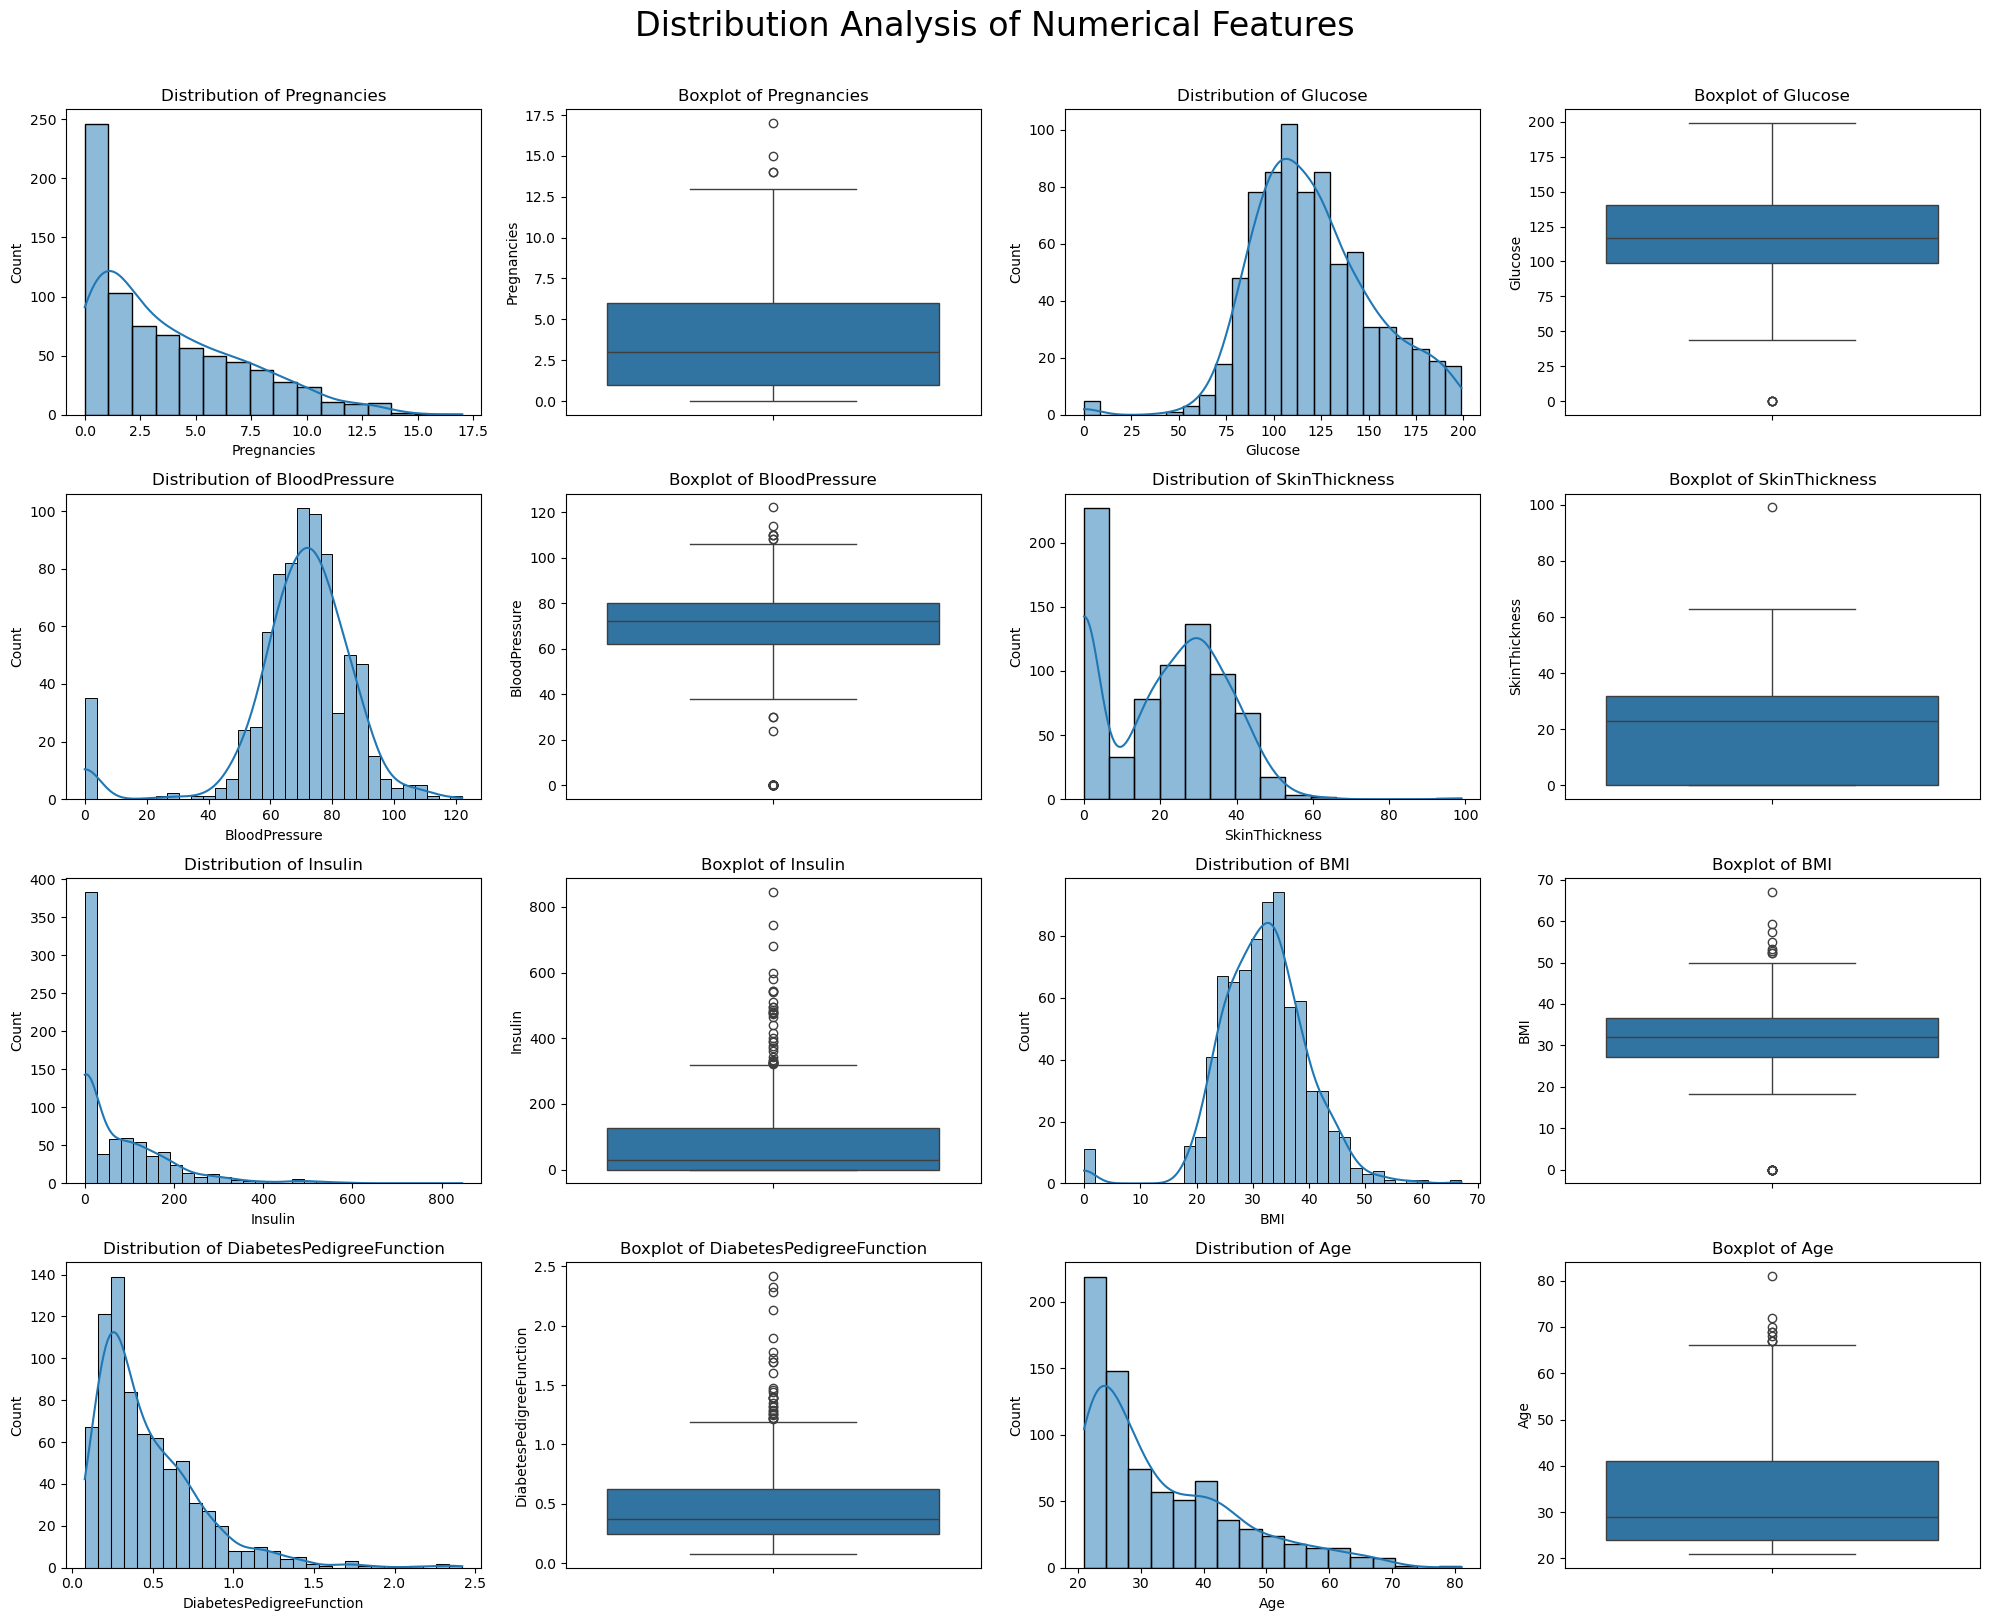

In [5]:
# Create organized subplots
fig, axes = plt.subplots(4, 4, figsize=(20, 16))
fig.suptitle('Distribution Analysis of Numerical Features', fontsize=24, y=1.01)

for i, col in enumerate(numeric_features):
    # Histogram
    row, col_idx = i // 2, (i % 2) * 2
    sns.histplot(df[col], kde=True, ax=axes[row, col_idx])
    axes[row, col_idx].set_title(f'Distribution of {col}')
    
    # Boxplot
    sns.boxplot(y=df[col], ax=axes[row, col_idx + 1])
    axes[row, col_idx + 1].set_title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

### Categorical analysis

#### Non-graphical univariate analysis

In [6]:
# Basic statistics
outcome_counts = df['Outcome'].value_counts().sort_index()
outcome_percentages = df['Outcome'].value_counts(normalize=True).sort_index() * 100

print("Class Distribution:")
print(f"No Diabetes (0): {outcome_counts[0]} samples ({outcome_percentages[0]:.1f}%)")
print(f"Diabetes (1): {outcome_counts[1]} samples ({outcome_percentages[1]:.1f}%)")
print(f"Total samples: {len(df)}")

# Class imbalance ratio
imbalance_ratio = outcome_counts[0] / outcome_counts[1]
print(f"Class imbalance ratio (No Diabetes : Diabetes): {imbalance_ratio:.2f}:1")

# Determine if dataset is imbalanced
if imbalance_ratio > 1.5 or imbalance_ratio < 0.67:
    print("Dataset shows class imbalance - consider resampling techniques")
else:
    print("Dataset is relatively balanced")

Class Distribution:
No Diabetes (0): 500 samples (65.1%)
Diabetes (1): 268 samples (34.9%)
Total samples: 768
Class imbalance ratio (No Diabetes : Diabetes): 1.87:1
Dataset shows class imbalance - consider resampling techniques


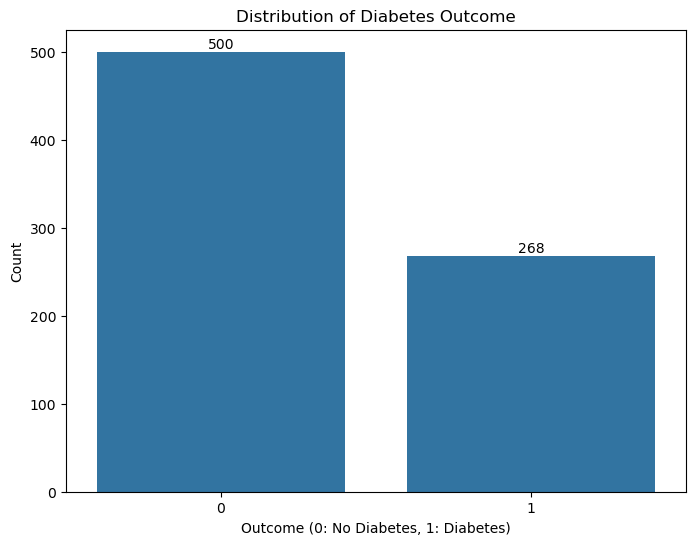

In [7]:
# Simple bar chart version
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Outcome')
plt.title('Distribution of Diabetes Outcome')
plt.xlabel('Outcome (0: No Diabetes, 1: Diabetes)')
plt.ylabel('Count')

# Add count labels
ax = plt.gca()
for container in ax.containers:
    ax.bar_label(container)

plt.show()

### Summary

- Most of the data's distribution is acceptable in order to be used for model training since Skewness and Kurtosis values of dataset features are in the accept value range (Skewness: -2 < x < 2; Kurtosis: -7 < x < 7), except Insulin data distribution, which needs some transformations (log, square root, Box–Cox,...).
- Graphical Numberic Analysis: don't know
- The dataset show it's imbalance, which is the problem needed to be dealt with

## Bivariate/Multivariate Analysis

### Overview


Binary analysis is the process of finding the relationship between numerical and categorical.

**Main objectives:**

- Data Preparation: label the columns, separate input variables (features) and the outcome variable.

- Bivariate Analysis: compare the distribution of each input variable with the outcome using boxplots and violin plots.

- Statistical testing (t-test): assesses the significant differences between two Outcome groups.

- Scatter Plot: visualize the relationship between two continuous variables, differentiated by the outcome.

- Correlation Analysis: create a correlation matrix to understand the relationships between variables.

**Results from EDA will help:**

- Identify which variables are strongly related to diabetes.

- Understand the data structure before building a predictive model.

- Detect abnormalities or noteworthy data patterns.

### Preparation

#### Library

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

#### Read data and separate predictors and outcome

In [ ]:
columns = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness",
           "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"]

df = pd.read_csv('pima-indians-diabetes.data.csv', names=columns)

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

features = df.drop(columns=["Outcome"])
label = df["Outcome"]

### Graphical bivariate analysis

#### Boxplot

Use **Boxplot** to see the differences between each input variable and the outcome.

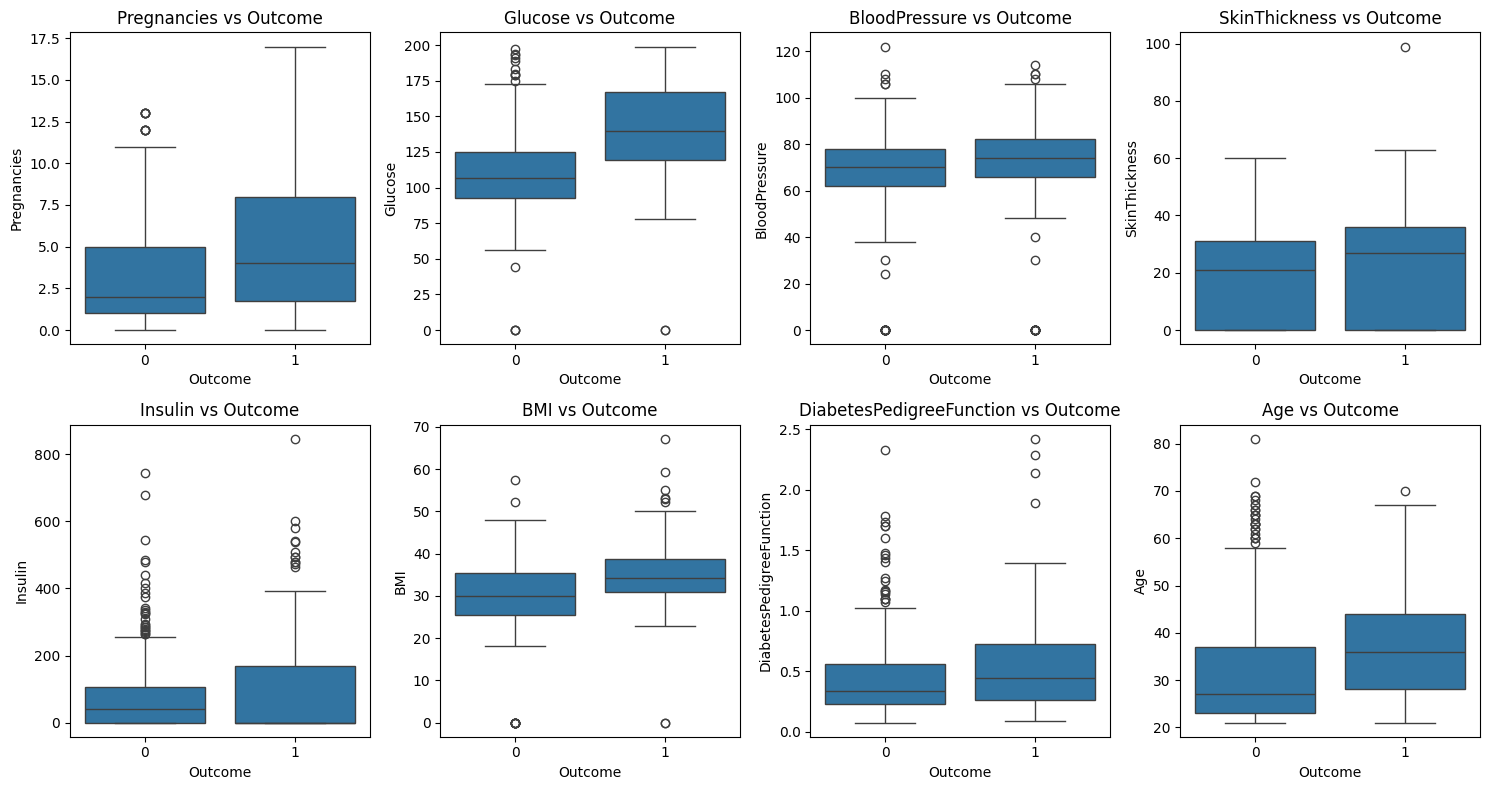

In [ ]:
cols = features.columns
n = len(cols)
n_cols = 4
n_rows = (n + n_cols - 1) // n_cols

plt.figure(figsize=(15, 4*n_rows))
for i, col in enumerate(cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(x=label, y=df[col])
    plt.title(f"{col} vs Outcome")
plt.tight_layout()
plt.show()

##### Summary

- Input values such as **Glucose, BMI, Age, Pregnancies, Insulin** tend to be higher in the Outcome = 1 group, especially Glucose.

- The variables **BloodPressure, SkinThickness, and DiabetesPedigreeFunction** have slight differences.

- Some variables have multiple outlier values or equal to 0, which need to be processed before they can be used in a machine learning model.

#### Violin Plots

Use **Violinplot** to see the distribution and density of each input value with the outcome.

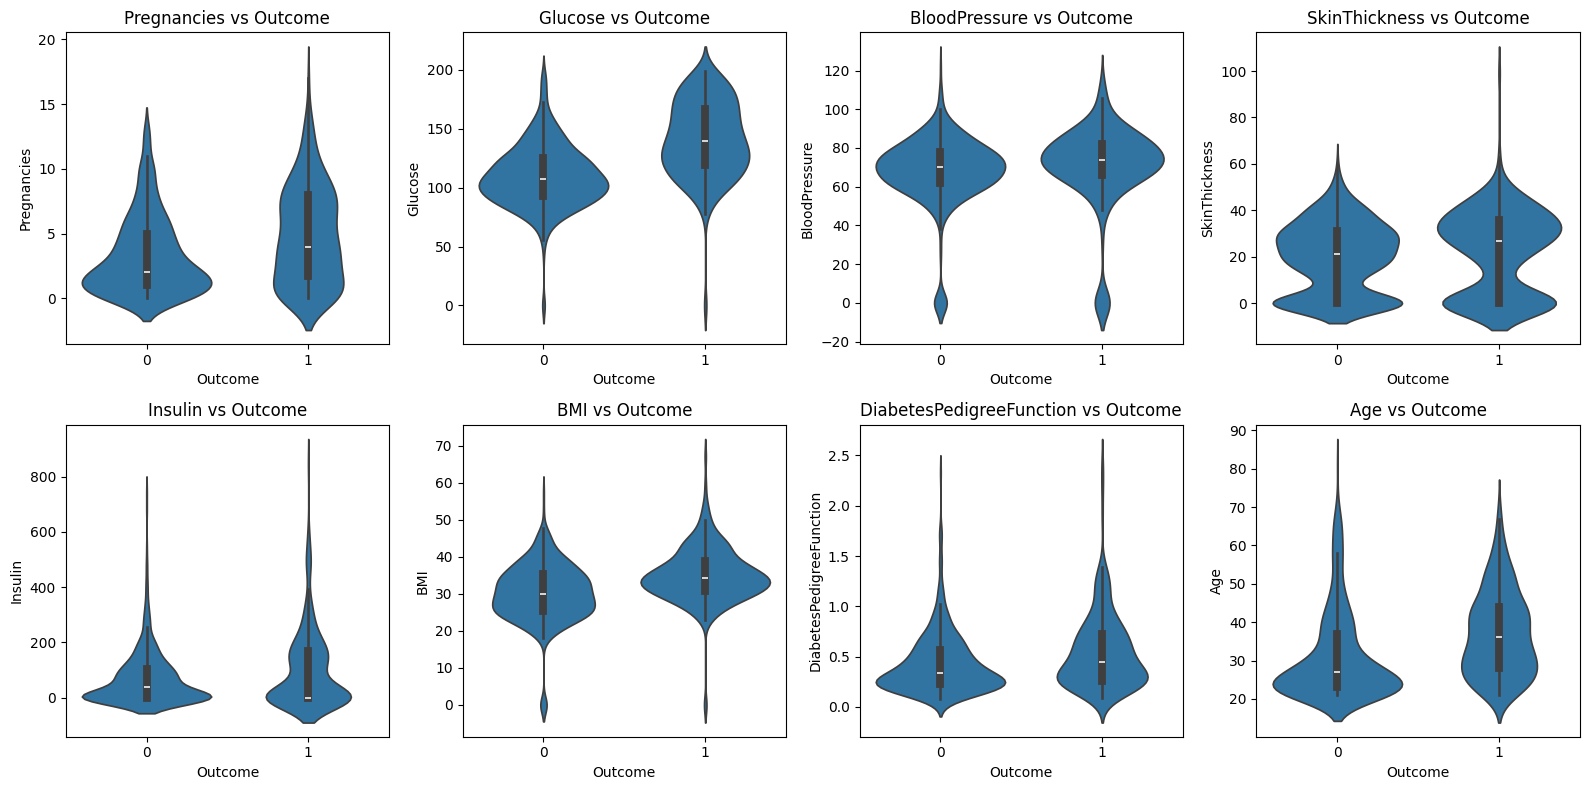

In [ ]:
cols = features.columns
n = len(cols)
n_cols = 4
n_rows = (n + n_cols - 1) // n_cols

plt.figure(figsize=(16, 4 * n_rows))

for i, col in enumerate(cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.violinplot(x=label, y=df[col])
    plt.title(f"{col} vs Outcome")

plt.tight_layout()
plt.show()

##### Summary

- The **violinplot** chart shows that the input seas of **Glucose, Age, and Pregnancies** seem to be important factors to distinguish the two outcom groups.

- The initial value of **Glucose** is shown to be the strongest differentiator, which can affect the outcome.

#### Scatter Plot

Use a **Scatter Plot** to gain a better visual understanding of the relationships among the input values.

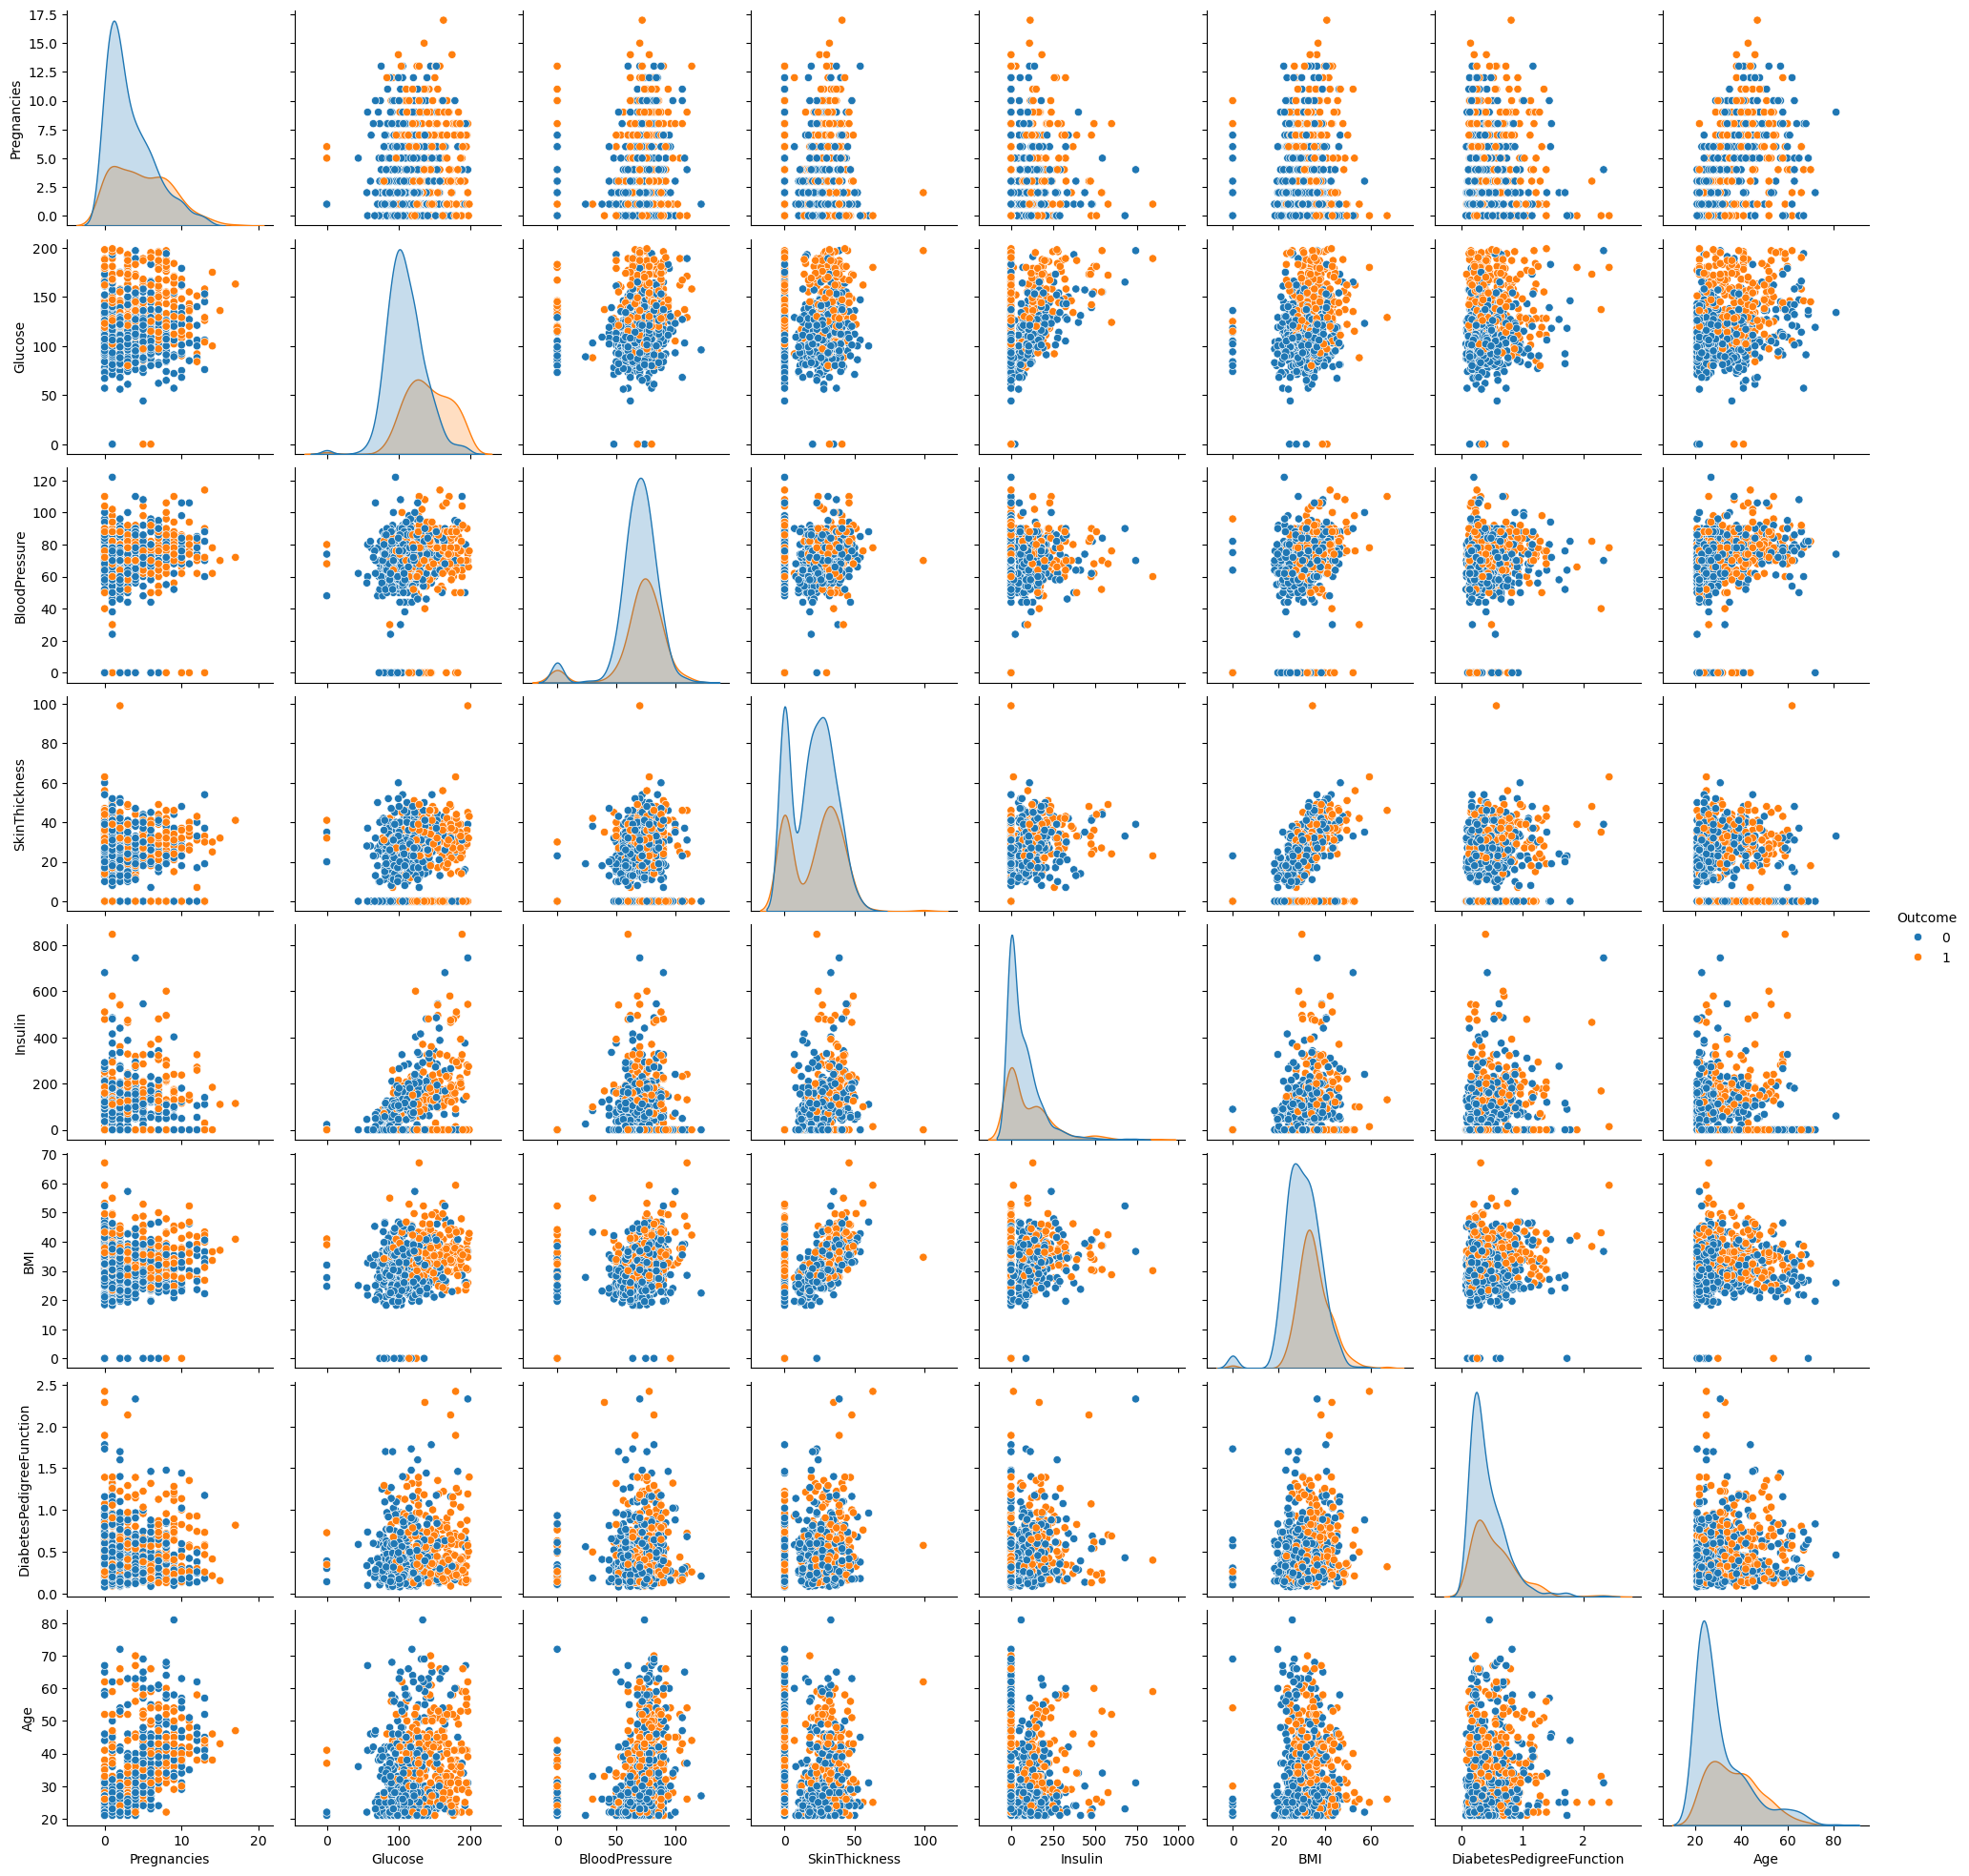

In [ ]:
sns.pairplot(df, hue="Outcome", diag_kind="kde")
plt.show()

##### Summary

**Clearest separation**

- **Glucose:** Two groups are very clearly separated, outcome 1 is concentrated at high values.

- **Age:** Outcome 1 tends to be older

**Strong correlation between variables**

- **Glucose-Insulin:** A Clear Positive Correlation.

- **BMI-SkinThickness:** Slightly correlated.

- **Age-Pregnancies:** Positive correlation (advanced age → multiple pregnancies).

**Different**

- Many variables have abnormal 0 values (**SkinThickness, Insulin, BloodPressure**) - possibly missing data.

#### Correlation Matrix

Use the **Correlation Matrix** to identify input values that have a strong relationship with each other and a strong relationship with the outcome.

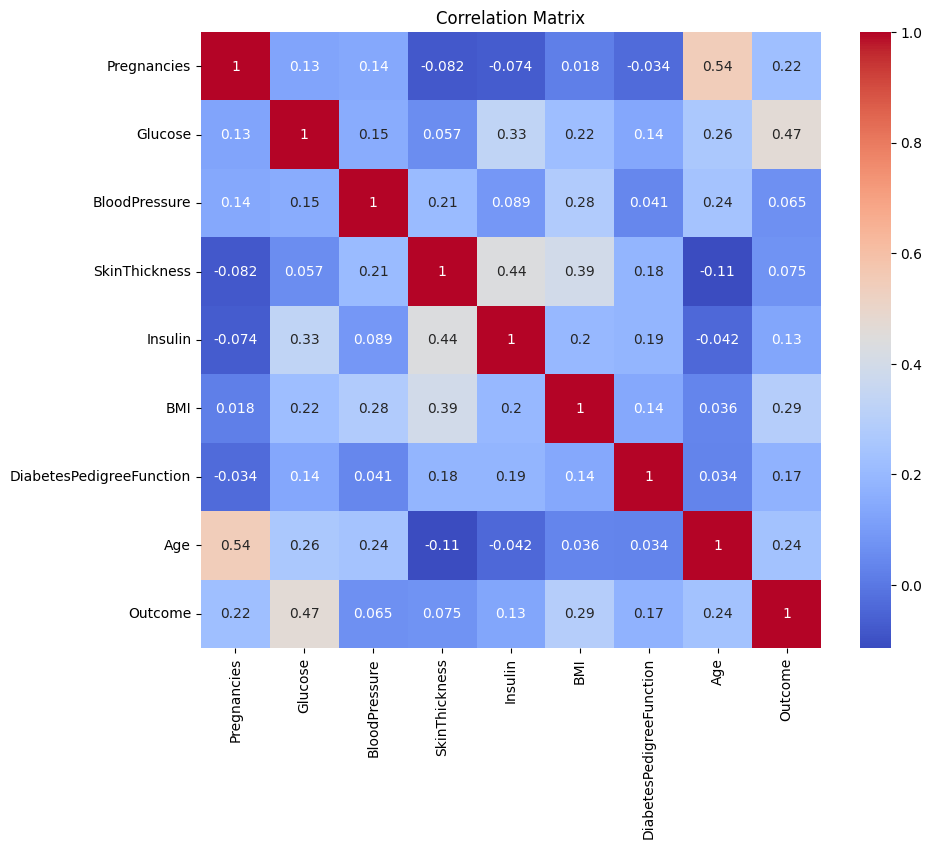

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

##### Summary

**Strong correlation with Outcome**

- **Glucose** (0.47): The strongest correlation.

- **BMI** (0.29): Moderate correlation.

- **Age** (0.24): Slightly correlated.

- **Pregnancies** (0.22): Slightly correlated.

**Correlation between variables**

- **Pregnancies-Age** (0.54): Strongest correlation (older age → more pregnancies).

- **SkinThickness-Insulin** (0.44): Moderate correlation.

- **SkinThickness-BMI** (0.39): Moderate correlation.

- **Glucose-Insulin** (0.33): Moderate correlation.

### Non-graphical bivariate analysis

#### Independent T-Test

Use **Independent T-Test** to statistically analyze whether this difference is significant or just random.

- p < 0.05 → significant in distinguishing between diabetic and non-diabetic patients.

- p > 0.05 → may have less classification value.

In [ ]:
cols = features.columns

for col in cols:
    group0 = df[df["Outcome"] == 0][col]
    group1 = df[df["Outcome"] == 1][col]
    stat, p = ttest_ind(group0, group1, nan_policy='omit')
    print(f"{col}: p-value = {p:.4f}")

Pregnancies: p-value = 0.0000
Glucose: p-value = 0.0000
BloodPressure: p-value = 0.0715
SkinThickness: p-value = 0.0383
Insulin: p-value = 0.0003
BMI: p-value = 0.0000
DiabetesPedigreeFunction: p-value = 0.0000
Age: p-value = 0.0000


##### Summary

- 7 out of 8 variables are statistically significant in predicting the outcome.

- **BloodPressure** is not statistically significant → can be removed from the model.

- **Glucose, BMI, Age, and Pregnancies** are the most important factors (very small p-value).

## Multivariate Analysis

### Overview

Multivariate analysis examines relationships among ALL variables simultaneously, considering their joint distributions, interactions, and combined effects on the outcome.

**Visual Exploration**
- 3D scatterplots of predictors colored by outcome.
- Dimensionality reduction (PCA) → project many predictors into 2D and color by outcome.

### Preparation

#### Separate predictors and outcome

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn.decomposition import PCA

columns = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness",
           "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"]

df = pd.read_csv('pima-indians-diabetes.data.csv', names=columns)

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

features = df.drop(columns=["Outcome"])
label = df["Outcome"]

### Visual Exploration

#### Description

- Scatterplots: A way to visualize multivariate data to help classify and understand the relationships among the variables.
- Pairplot: Show all 2D scatter plots of each pair of features chosen from 3D Scatterplots.
- Dimensionality Reduction

#### 3D Scatterplots

This part will illustrate the relationships among three or more variables by visualizing it using 3D Scatterplots.

In order to perform 3D Scatterplots graph, we need to choose 3 features in the dataset.

We could not randomly choose 3 features out of 8 features to visualize it and continue doing that until all of feature combinations are used, as it is waste of time. Instead, we could rely on the result from bivariate analysis, typically the **Correlation heatmap**.

From the result, **Glucose** and **BMI** features have the strongest relationship with the outcome. Because of that, we will choose those as the two first features. For the third feature, we will choose variables that are related to diabete disease among the others. **Pregnancies** and **Age** are the most reliable information, as it has strong relationship with the outcome, so we choose those two, and visualize iteratively.

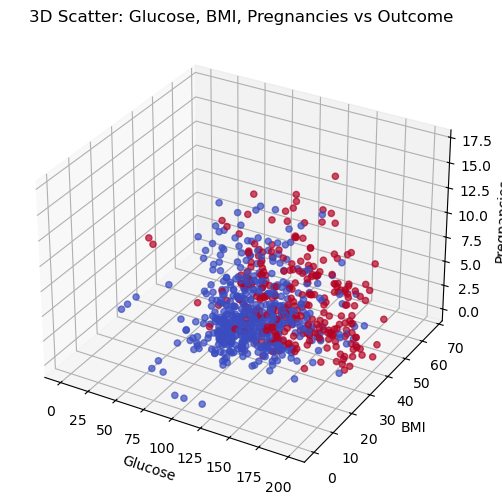

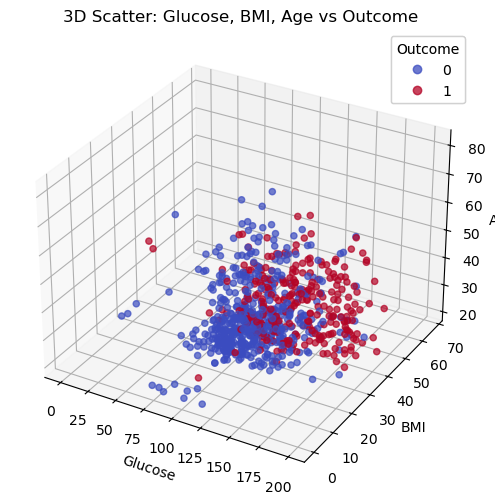

In [ ]:
# assume your dataframe is called df
# predictors

x = df['Glucose']
y = df['BMI']
z1 = df['Pregnancies']
z2 = df['Age']
target = df['Outcome']  # 0 = no diabetes, 1 = diabetes

# 3D scatter: Glucose, BMI, Pregnancies
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter3D(x, y, z1, c=target, cmap='coolwarm', alpha=0.7)

ax.set_xlabel('Glucose')
ax.set_ylabel('BMI')
ax.set_zlabel('Pregnancies')
ax.set_title('3D Scatter: Glucose, BMI, Pregnancies vs Outcome')

# add legend for outcome
# legend = ax.legend(*scatter.legend_elements(), title="Outcome")
# ax.add_artist(legend)

plt.show()

# 3D scatter: Glucose, BMI, Age
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter3D(x, y, z2, c=target, cmap='coolwarm', alpha=0.7)

ax.set_xlabel('Glucose')
ax.set_ylabel('BMI')
ax.set_zlabel('Age')
ax.set_title('3D Scatter: Glucose, BMI, Age vs Outcome')

legend = ax.legend(*scatter.legend_elements(), title="Outcome")
ax.add_artist(legend)

plt.show()

The 3D scatterplots show too much overlap from the three chosen features, which can be conclude that three features alone will not fully separate diabetics and non-diabetics. It could be a hint that we should try higher dimensions or smarter approaches.

We will try increase dimensions of the Scatterplots by applying more features into the graph.
We will choose features that have the highest correlation rate with the outcome compared to others
- **4D Scatterplots**: Use all of the chosen features (Glucose, BMI, Pregnancies, Age)
- **5D Scatterplots**: Add DiabetesPedigreeFunction features
- **6D Scatterplots**: Add Insulin features

##### 3D Scatter plots but in a different angle

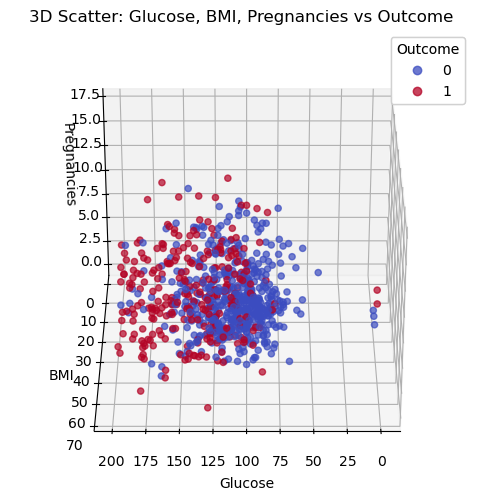

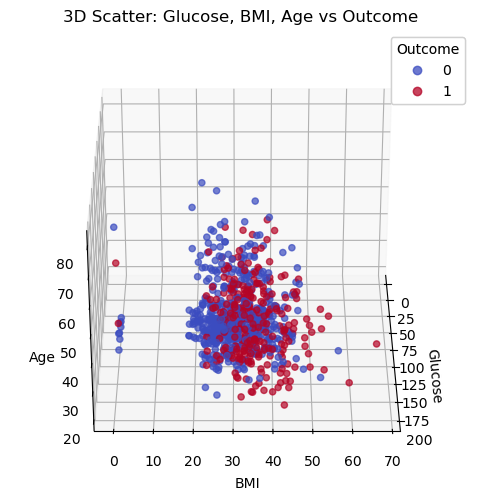

In [ ]:
# assume your dataframe is called df
# predictors

x = df['Glucose']
y = df['BMI']
z1 = df['Pregnancies']
z2 = df['Age']
target = df['Outcome']  # 0 = no diabetes, 1 = diabetes

# 3D scatter: Glucose, BMI, Pregnancies
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter3D(x, y, z1, c=target, cmap='coolwarm', alpha=0.7)

ax.set_xlabel('Glucose')
ax.set_ylabel('BMI')
ax.set_zlabel('Pregnancies')
ax.set_title('3D Scatter: Glucose, BMI, Pregnancies vs Outcome')
ax.view_init(elev=30, azim=90)

# add legend for outcome
legend = ax.legend(*scatter.legend_elements(), title="Outcome")
ax.add_artist(legend)

plt.show()

# 3D scatter: Glucose, BMI, Age
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter3D(x, y, z2, c=target, cmap='coolwarm', alpha=0.7)

ax.set_xlabel('Glucose')
ax.set_ylabel('BMI')
ax.set_zlabel('Age')
ax.set_title('3D Scatter: Glucose, BMI, Age vs Outcome')
ax.view_init(elev=30, azim=0)

legend = ax.legend(*scatter.legend_elements(), title="Outcome")
ax.add_artist(legend)

plt.show()

we can clearly see that if we look from a specific angle (Glucose, Pregnancies, BMI), we could see that at the point that Glucose goes from >= 150, the number of people diagnosed with diabetes was outweight that of non-diabetics.

in the 3D scatter plots (Glucose, Age, BMI), the same thing happens after Glucose figure is larger than 125, but the splitness is not as clear as the other

BMI < 25 => non-diabetics 

##### Check Glucose >= 150

In [ ]:
# Analyze specifically the problematic glucose >= 150 range
low_glucose_df = df[df['Glucose'] >= 150].copy()

print(f"Total samples with Glucose >= 150: {len(low_glucose_df)}")
print(f"Diabetes cases in high glucose group: {low_glucose_df['Outcome'].sum()}")
print(f"Percentage with diabetes: {(low_glucose_df['Outcome'].sum() / len(low_glucose_df)) * 100:.1f}%")

# Check which features differentiate best in this subset
correlation_low_glucose = low_glucose_df.corr()['Outcome'].abs().sort_values(ascending=False)
print("\nCorrelations with Outcome in Glucose < 150 subset:")
print(correlation_low_glucose)

Total samples with Glucose >= 150: 143
Diabetes cases in high glucose group: 106
Percentage with diabetes: 74.1%

Correlations with Outcome in Glucose < 150 subset:
Outcome                     1.000000
Glucose                     0.248107
BMI                         0.149393
Insulin                     0.085608
Pregnancies                 0.084478
DiabetesPedigreeFunction    0.081748
SkinThickness               0.038173
BloodPressure               0.029578
Age                         0.008564
Name: Outcome, dtype: float64


##### Check Glucose < 150

In [ ]:
# Analyze specifically the problematic glucose < 150 range
low_glucose_df = df[df['Glucose'] < 150].copy()

print(f"Total samples with Glucose < 150: {len(low_glucose_df)}")
print(f"Diabetes cases in low glucose group: {low_glucose_df['Outcome'].sum()}")
print(f"Percentage with diabetes: {(low_glucose_df['Outcome'].sum() / len(low_glucose_df)) * 100:.1f}%")

# Check which features differentiate best in this subset
correlation_low_glucose = low_glucose_df.corr()['Outcome'].abs().sort_values(ascending=False)
print("\nCorrelations with Outcome in Glucose < 150 subset:")
print(correlation_low_glucose)

Total samples with Glucose < 150: 625
Diabetes cases in low glucose group: 162
Percentage with diabetes: 25.9%

Correlations with Outcome in Glucose < 150 subset:
Outcome                     1.000000
Glucose                     0.290183
BMI                         0.258901
Age                         0.224316
Pregnancies                 0.211535
DiabetesPedigreeFunction    0.155254
Insulin                     0.070030
SkinThickness               0.039723
BloodPressure               0.021106
Name: Outcome, dtype: float64


##### 3D Scatterplots (Glucose < 150)

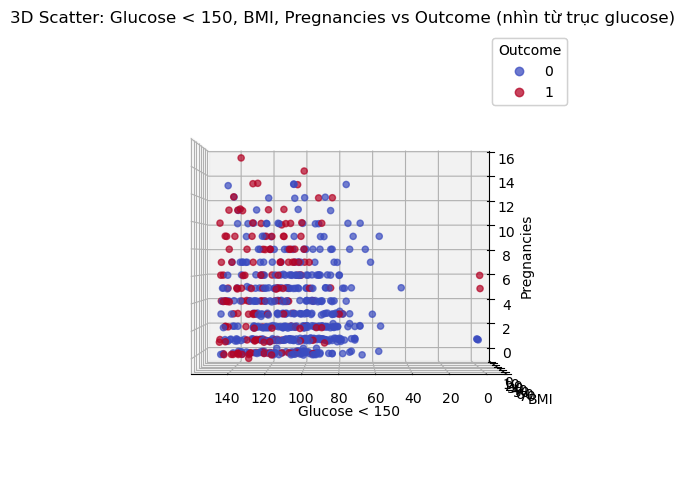

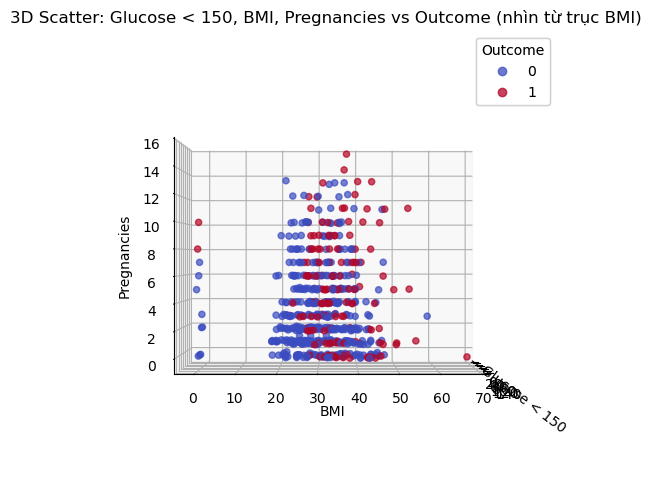

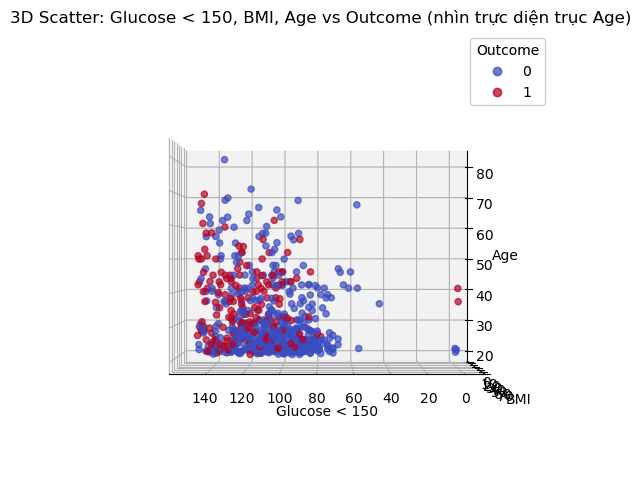

In [ ]:
# assume your dataframe is called df
# predictors

x = df[df['Glucose'] < 150]['Glucose']
y = df[df['Glucose'] < 150]['BMI']
z1 = df[df['Glucose'] < 150]['Pregnancies']
z2 = df[df['Glucose'] < 150]['Age']
target = df[df['Glucose'] < 150]['Outcome']  # 0 = no diabetes, 1 = diabetes

# 3D scatter: Glucose, BMI, Pregnancies (look from glucose axis)
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter3D(x, y, z1, c=target, cmap='coolwarm', alpha=0.7)

ax.set_xlabel('Glucose < 150')
ax.set_ylabel('BMI')
ax.set_zlabel('Pregnancies')
ax.set_title('3D Scatter: Glucose < 150, BMI, Pregnancies vs Outcome (nhìn từ trục glucose)')
ax.view_init(elev=0, azim=90)

# add legend for outcome
legend = ax.legend(*scatter.legend_elements(), title="Outcome")
ax.add_artist(legend)
plt.show()

# 3D scatter: Glucose, BMI, Pregnancies (look from BMI axis)
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter3D(x, y, z1, c=target, cmap='coolwarm', alpha=0.7)

ax.set_xlabel('Glucose < 150')
ax.set_ylabel('BMI')
ax.set_zlabel('Pregnancies')
ax.set_title('3D Scatter: Glucose < 150, BMI, Pregnancies vs Outcome (nhìn từ trục BMI)')
ax.view_init(elev=0, azim=0)

# add legend for outcome
legend = ax.legend(*scatter.legend_elements(), title="Outcome")
ax.add_artist(legend)
plt.show()

# 3D scatter: Glucose, BMI, Age
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter3D(x, y, z2, c=target, cmap='coolwarm', alpha=0.7)

ax.set_xlabel('Glucose < 150')
ax.set_ylabel('BMI')
ax.set_zlabel('Age')
ax.set_title('3D Scatter: Glucose < 150, BMI, Age vs Outcome (nhìn trực diện trục Age)')
ax.view_init(elev=0, azim=90)

legend = ax.legend(*scatter.legend_elements(), title="Outcome")
ax.add_artist(legend)

plt.show()

BMI < 26: non diabetics

Glucose <= 100: non diabetics

Age <= 30: non diabetics

##### 3D Scatterplots (Glucose >= 150)

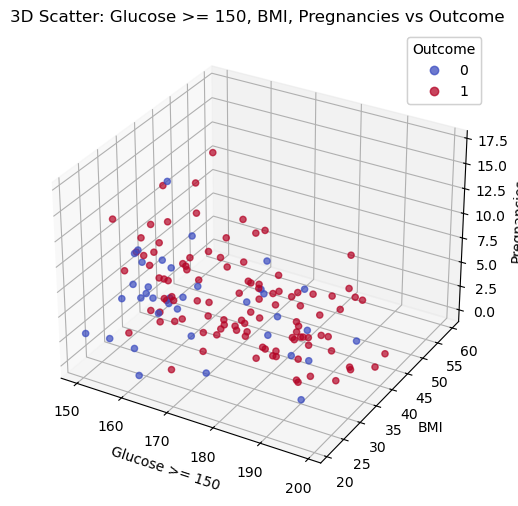

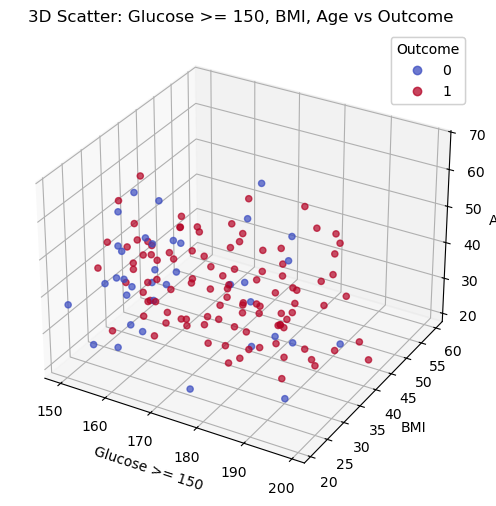

In [ ]:
# assume your dataframe is called df
# predictors

x = df[df['Glucose'] >= 150]['Glucose']
y = df[df['Glucose'] >= 150]['BMI']
z1 = df[df['Glucose'] >= 150]['Pregnancies']
z2 = df[df['Glucose'] >= 150]['Age']
target = df[df['Glucose'] >= 150]['Outcome']  # 0 = no diabetes, 1 = diabetes

# 3D scatter: Glucose, BMI, Pregnancies
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter3D(x, y, z1, c=target, cmap='coolwarm', alpha=0.7)

ax.set_xlabel('Glucose >= 150')
ax.set_ylabel('BMI')
ax.set_zlabel('Pregnancies')
ax.set_title('3D Scatter: Glucose >= 150, BMI, Pregnancies vs Outcome')
# ax.view_init(elev=90, azim=90)

# add legend for outcome
legend = ax.legend(*scatter.legend_elements(), title="Outcome")
ax.add_artist(legend)

plt.show()

# 3D scatter: Glucose, BMI, Age
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter3D(x, y, z2, c=target, cmap='coolwarm', alpha=0.7)

ax.set_xlabel('Glucose >= 150')
ax.set_ylabel('BMI')
ax.set_zlabel('Age')
ax.set_title('3D Scatter: Glucose >= 150, BMI, Age vs Outcome')
# ax.view_init(elev=90, azim=90)

legend = ax.legend(*scatter.legend_elements(), title="Outcome")
ax.add_artist(legend)

plt.show()

Most of it (about 75%) are diabetics. Lots of overlap

### Summary

- Adding too many features is not always a good thing in training ML models.
- Choosing 5 features Glucose, BMI, Pregnancies, Age, and DiabetesPedigreeFunction is the best option if we want to approach the way that choosing features that impact the outcome most

## Detect anomalies and impossible values

### Description

This section focus on identifying physiologically impossible values or highly unrealistic values within the dataset that may indicate data collection errors or missing value encoding issues.

Based on medical literature and physiological constraints, the following ranges represent realistic values for each feature:

- **Pregnancies: x ≥ 0**: Negative pregnancy counts are impossible.

- **Glucose: 50 ≤ x ≤ 500 mg/dL**: Values below 50 mg/dL typically indicate severe hypoglycemia requiring immediate medical intervention, while values above 500 mg/dL represent extreme hyperglycemia that would likely be fatal without treatment. Zero values are impossible for living subjects.

- **BloodPressure: 40 ≤ x ≤ 200 mmHg**: Diastolic blood pressure below 40 mmHg or above 200 mmHg represents extreme physiological conditions incompatible with normal life. Zero values are impossible for living subjects.

- **SkinThickness: 5 ≤ x ≤ 50 mm**: Triceps skinfold thickness below 5 mm or above 50 mm is extremely rare, even in cases of severe malnutrition or morbid obesity. Zero values are physiologically impossible.

- **Insulin: x ≥ 2 μU/ml**: Serum insulin levels cannot be negative. Values below 2 μU/ml are extremely rare even in Type 1 diabetes patients. Zero values likely indicate missing data rather than true measurements.

- **BMI: 10 ≤ x ≤ 70**: BMI values below 10 kg/m² are incompatible with life, while values above 70 kg/m² are extraordinarily rare even in cases of extreme obesity. Zero values are impossible.

- **DiabetesPedigreeFunction: x ≥ 0**: This is a calculated score representing genetic predisposition to diabetes based on family history. Negative values would be meaningless in this context.

- **Age: x > 0**: Age values must be positive integers. Zero or negative values are impossible.


### Detection

#### Detect outlier values base on IQR

In [21]:
# Get the valid range
left_pregnancies = quartiles.loc[0.25, 'Pregnancies'] - 1.5 * iqr['Pregnancies']
right_pregnancies = quartiles.loc[0.75, 'Pregnancies'] + 1.5 * iqr['Pregnancies']
left_glucose = quartiles.loc[0.25, 'Glucose'] - 1.5 * iqr['Glucose']
right_glucose = quartiles.loc[0.75, 'Glucose'] + 1.5 * iqr['Glucose']
left_bloodPressure = quartiles.loc[0.25, 'BloodPressure'] - 1.5 * iqr['BloodPressure']
right_bloodPressure = quartiles.loc[0.75, 'BloodPressure'] + 1.5 * iqr['BloodPressure']
left_skinThickness = quartiles.loc[0.25, 'SkinThickness'] - 1.5 * iqr['SkinThickness']
right_skinThickness = quartiles.loc[0.75, 'SkinThickness'] + 1.5 * iqr['SkinThickness']
left_insulin = quartiles.loc[0.25, 'Insulin'] - 1.5 * iqr['Insulin']
right_insulin = quartiles.loc[0.75, 'Insulin'] + 1.5 * iqr['Insulin']
left_bmi = quartiles.loc[0.25, 'BMI'] - 1.5 * iqr['BMI']
right_bmi = quartiles.loc[0.75, 'BMI'] + 1.5 * iqr['BMI']
left_dpf = quartiles.loc[0.25, 'DiabetesPedigreeFunction'] - 1.5 * iqr['DiabetesPedigreeFunction']
right_dpf = quartiles.loc[0.75, 'DiabetesPedigreeFunction'] + 1.5 * iqr['DiabetesPedigreeFunction']
left_age = quartiles.loc[0.25, 'Age'] - 1.5 * iqr['Age']
right_age = quartiles.loc[0.75, 'Age'] + 1.5 * iqr['Age']

outlier_checks = {
    'Pregnancies': (df['Pregnancies'] < left_pregnancies) | (df['Pregnancies'] > right_pregnancies),
    'Glucose': (df['Glucose'] < left_glucose) | (df['Glucose'] > right_glucose),
    'BloodPressure': (df['BloodPressure'] < left_bloodPressure) | (df['BloodPressure'] > right_bloodPressure),
    'SkinThickness': (df['SkinThickness'] < left_skinThickness) | (df['SkinThickness'] > right_skinThickness),
    'Insulin': (df['Insulin'] < left_insulin) | (df['Insulin'] > right_insulin),
    'BMI': (df['BMI'] < left_bmi) | (df['BMI'] > right_bmi),
    'DiabetesPedigreeFunction': (df['DiabetesPedigreeFunction'] < left_dpf) | (df['DiabetesPedigreeFunction'] > right_dpf),
    'Age': (df['Age'] < left_age) | (df['Age'] > right_age)
}

for feature, condition in outlier_checks.items():
    count = condition.sum()
    percentage = (count / len(df)) * 100
    print(f"{feature}: {count} outlier values ({percentage:.1f}%)")

Pregnancies: 4 outlier values (0.5%)
Glucose: 5 outlier values (0.7%)
BloodPressure: 45 outlier values (5.9%)
SkinThickness: 1 outlier values (0.1%)
Insulin: 34 outlier values (4.4%)
BMI: 19 outlier values (2.5%)
DiabetesPedigreeFunction: 29 outlier values (3.8%)
Age: 9 outlier values (1.2%)


#### Detection of impossible value

In [8]:
# Check for zeros in features where zero is impossible
zero_checks = {
    'Pregnancies': (df['Pregnancies'] < 0),
    'Glucose': (df['Glucose'] <= 0),
    'BloodPressure': (df['BloodPressure'] <= 0), 
    'SkinThickness': (df['SkinThickness'] <= 0),
    'Insulin': (df['Insulin'] <= 0),
    'BMI': (df['BMI'] <= 0),
    'Age': (df['Age'] <= 0)
}

for feature, condition in zero_checks.items():
    count = condition.sum()
    percentage = (count / len(df)) * 100
    print(f"{feature}: {count} zero values ({percentage:.1f}%)")

Pregnancies: 0 zero values (0.0%)
Glucose: 5 zero values (0.7%)
BloodPressure: 35 zero values (4.6%)
SkinThickness: 227 zero values (29.6%)
Insulin: 374 zero values (48.7%)
BMI: 11 zero values (1.4%)
Age: 0 zero values (0.0%)


### Summary

- There are numorous anomalies values in this dataset
- Insulin column has the largest proportion of anomalies values (48.7%)

## Detect outliers

Not done yet

## Phần của Tú làm mà tôi chưa check/sửa lại

In [10]:
# Các cột có giá trị 0 không hợp lý
cols_with_zeros = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]

# Thay thế 0 bằng NaN
df[cols_with_zeros] = df[cols_with_zeros].replace(0, np.nan)

# Kiểm tra số lượng NaN
print(df.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [11]:
#Xử lý NaN (thay bằng median)
for col in cols_with_zeros:
    median_value = df[col].median()
    df[col] = df[col].fillna(median_value)
print(df.isnull().sum())


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [12]:
print(df.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin         BMI  DiabetesPedigreeFunction         Age     Outcome
count   768.000000  768.000000     768.000000     768.000000  768.000000  768.000000                768.000000  768.000000  768.000000
mean      3.845052  121.656250      72.386719      29.108073  140.671875   32.455208                  0.471876   33.240885    0.348958
std       3.369578   30.438286      12.096642       8.791221   86.383060    6.875177                  0.331329   11.760232    0.476951
min       0.000000   44.000000      24.000000       7.000000   14.000000   18.200000                  0.078000   21.000000    0.000000
25%       1.000000   99.750000      64.000000      25.000000  121.500000   27.500000                  0.243750   24.000000    0.000000
50%       3.000000  117.000000      72.000000      29.000000  125.000000   32.300000                  0.372500   29.000000    0.000000
75%       6.000000  140.250000      80.000000      32.0

<Axes: xlabel='Outcome', ylabel='Glucose'>

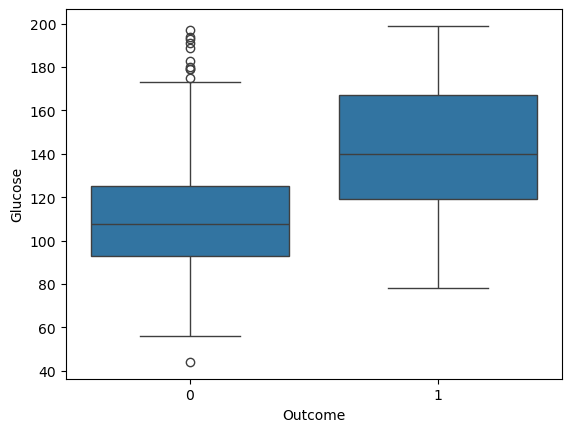

In [13]:
#Phân tích nhị biến (Bivariate Analysis)
sns.boxplot(x='Outcome', y='Glucose', data=df)


<Axes: xlabel='Age', ylabel='BMI'>

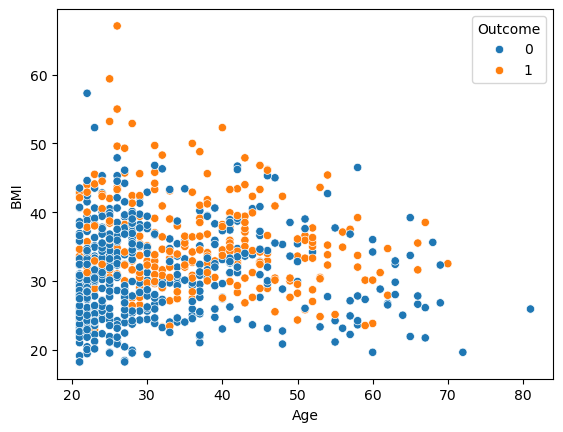

In [14]:
#Biểu đồ phân tán
sns.scatterplot(x='Age', y='BMI', hue='Outcome', data=df)


<Axes: >

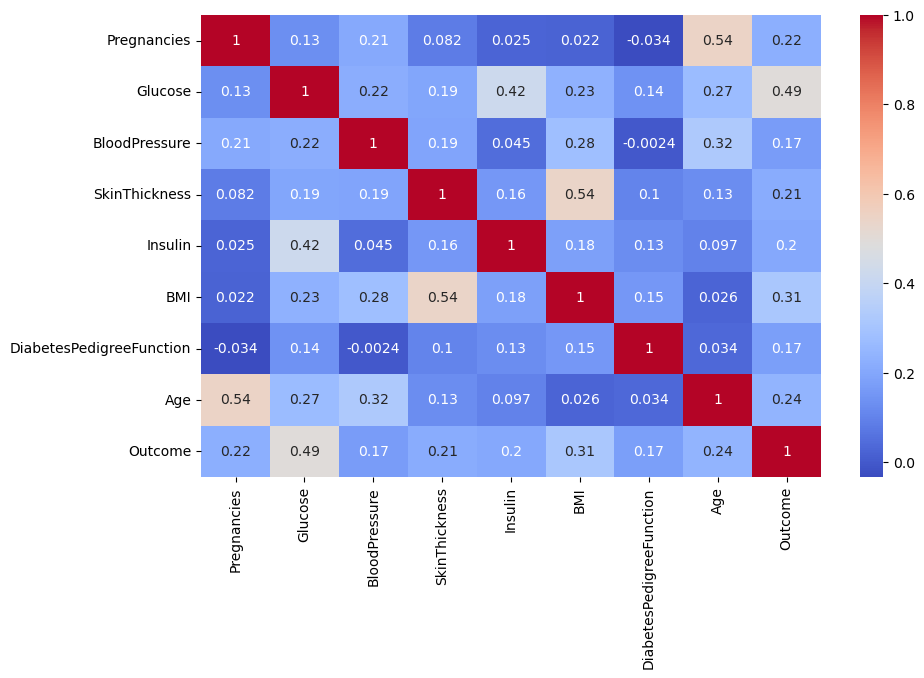

In [15]:
#Ma trận tương quan
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")


In [ ]:
# The end